### Agenda 
- Working with data using python libraries.
- Data Visualization
- Exploratory Data Analysis and Data Preprocessing

### EDA 
- Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.
- It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data

### Data Preprocessing
-  Data Preprocessing focuses on processing the data and making it suitable for the model.

- Before building any machine learning model it is crucial to perform data preprocessing to feed the correct data to the model to learn and predict. Model performance depends on the quality of data feeded to the model to train.

- It involves various steps like 
  - Handling duplicates
  - Handling missing values
  - Handling outliers
  - Handling garbage data, incorrect or invalid data 
  - Changing data types 
  - Converting features into numerical data type
  - Standardizing and normalising the data
  - Making transformations of variables as needed - log tranformation, power transformation etc 

- These are some of the common steps. But most of these data preprocessing steps depend on case to case basis.

### Objective: 
To do data analysis using python and explore the adult census income dataset using numpy and pandas libraries and drive meaningful insigths by performing Exploratory data analysis using visualization libraries and perform required preprocessing steps and prepare the data for model building.


### Dataset Description:
The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person. <br> Attribute information:

**Dataset Source:** https://www.kaggle.com/datasets/uciml/adult-census-income

- **age:** Age of an individual
- **workclass:** Working class of the individual
- **fnlwgt:** Weights based on the demographic characteristics
- **education:** Highest education of the individual
- **education.num:** Education encoded with unique numbers
- **marital.status:** Marital status of the individual
- **occupation:** Occupation of the individual
- **relationship:** Relation of the individual in the family
- **race:** Race of the individual
- **sex:** Gender of the individual (0 = Male, 1 = Female)
- **capital.gain:** Gain amount of the individual
- **capital.loss:** Loss amount of the individual
- **hours.per.week:** Working hours per week
- **native.country:** The native country of the individual
- **income:** Income of the individual

### Import required liraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder

### Load the dataset

In [ ]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 1. Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- There are 15 columns and around 32K records.
- There are 9 categorical columns and 6 numerical columns.

### 2. Is there any missing values present in the data.

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

- There are no missing values in the dataset.

### 3. Is there any duplicate records present in the dataset. If any drop them.

In [ ]:
len(df[df.duplicated()])

24

- Yes, there are 24 records which are duplicated, lets drop the duplicated records.

In [ ]:
## dropping duplicate records
df.drop_duplicates(inplace=True)

In [ ]:
## recheck id the duplicates are dropped or not
len(df[df.duplicated()])

0

### 4. What is the average age of males and females in the data?

In [ ]:
df.groupby('sex')['age'].mean()

sex
Female    36.864709
Male      39.436051
Name: age, dtype: float64

- The average age of the males is around 40 and the females is around 37.

### 5. Identify the qualification of most of the individuals?

In [ ]:
df['education'].mode()

0    HS-grad
dtype: object

- Most of the indiviuals education qualification is High-School graduate.

### 6. Find the middle most observation of age for different working class

In [ ]:
df.groupby('workclass')['age'].median()

workclass
?                   35.0
Federal-gov         43.0
Local-gov           41.0
Never-worked        18.0
Private             35.0
Self-emp-inc        45.0
Self-emp-not-inc    44.0
State-gov           39.0
Without-pay         57.0
Name: age, dtype: float64

### 7. What is the percentage of the Asian-Pac-Islander race people in the data?

In [ ]:
df['race'].value_counts(normalize=True)*100

White                 85.425823
Black                  9.595230
Asian-Pac-Islander     3.190214
Amer-Indian-Eskimo     0.955835
Other                  0.832898
Name: race, dtype: float64

In [ ]:
(df['race'].value_counts(normalize=True)*100).loc['Asian-Pac-Islander']

3.190214217659895

- The percentage of Asian-Pac-Islander race people in the data is around 3%.

### 8. Which occupation has more variability in the working hours?

In [ ]:
df.groupby('occupation')['hours.per.week'].var().sort_values(ascending=False).head()

occupation
Farming-fishing    300.534777
Priv-house-serv    264.825086
?                  222.257742
Armed-Forces       198.000000
Sales              175.202547
Name: hours.per.week, dtype: float64

- Farming-Fishing occupation has more variability in the working hours.

### 9. What is the range of the middle 50% of working hours per week?

In [ ]:
Q1 = df['hours.per.week'].quantile(0.25)
Q2 = df['hours.per.week'].quantile(0.50)
Q3 = df['hours.per.week'].quantile(0.75)
range_ = Q3 - Q1
print("The range of the middle 50% of working hours per week is",range_)

The range of the middle 50% of working hours per week is 5.0


### 10.  Is there any negatively skewed feature. Support your answer with a metric and the plot

In [ ]:
df.skew()

age                0.557663
fnlwgt             1.447703
education.num     -0.309500
capital.gain      11.949403
capital.loss       4.592702
hours.per.week     0.228759
dtype: float64

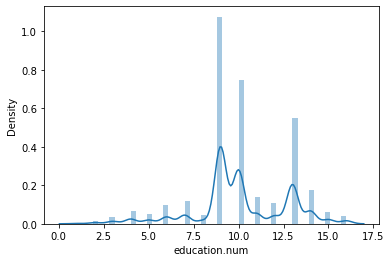

In [ ]:
sns.distplot(df['education.num'])
plt.show()

- "education.num" column is negatively skewed as we can observe from the values of skewness and the distribution plot.

### 11. Find the kurtosis of all the variables, and give appropriate interpretation

In [ ]:
df.kurt()

age                -0.169850
fnlwgt              6.222006
education.num       0.619024
capital.gain      154.682954
capital.loss       20.358254
hours.per.week      2.917718
dtype: float64

- By the above kurtosis values, we can say that age column is platykurtic and fnlwgt, education.num, capital.gain, capital.loss,hours.per.week are lepotokurtic where capital.gain has highest peak.

### 12. Identify the presence of extreme values in age using visualization techniques

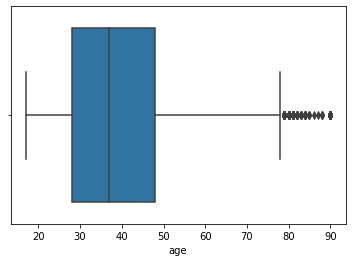

In [ ]:
sns.boxplot(df['age'])
plt.show()

- We can observe that there are extreme values at the upper whisker of the boxplot.

### 13. Is there any effect of age on the working hours of a person?

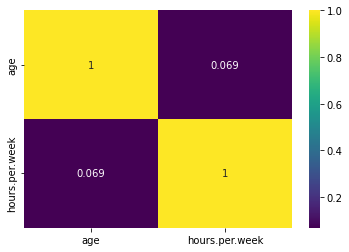

In [ ]:
sns.heatmap(df[['age','hours.per.week']].corr(),annot=True,cmap='viridis')
plt.show()

- The correlation value between age and hours.per.week is on the lesser side, there seem to be not much effect of age on the working hours of a person.

### 14. Is there any individual with age less than 18 and capital loss less than 100?

In [ ]:
df[(df['age']<18)   & (df['capital.loss']<100)]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1680,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
3987,17,Private,175024,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,2176,0,18,United-States,<=50K
4151,17,Private,191260,9th,5,Never-married,Other-service,Own-child,White,Male,1055,0,24,United-States,<=50K
4154,17,?,333100,10th,6,Never-married,?,Own-child,White,Male,1055,0,30,United-States,<=50K
4156,17,Private,103851,11th,7,Never-married,Adm-clerical,Own-child,White,Female,1055,0,20,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31869,17,?,256173,10th,6,Never-married,?,Own-child,White,Female,0,0,15,United-States,<=50K
31948,17,Private,214787,12th,8,Never-married,Adm-clerical,Own-child,White,Female,0,0,25,United-States,<=50K
32035,17,Private,24090,HS-grad,9,Never-married,Exec-managerial,Own-child,White,Female,0,0,35,United-States,<=50K
32310,17,Private,311907,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K


- As we can observe there are 385 such indiviuals where their age is less than 18 and capital loss less than 100.

### 15. Which occupation has the highest number of males?

In [ ]:
pd.crosstab(df['sex'],df['occupation'])

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
sex,,,,,,,,,,,,,,,
Female,841,2535,0,222,1159,65,164,549,1799,139,1513,76,1263,347,90
Male,1002,1233,9,3872,2906,927,1205,1451,1492,8,2623,573,2387,580,1507


- We can observe that occupation 'craft-repair' had the highest number of male employees.

### 16. Analyze the trend of the capital gain amount for different educational qualifications

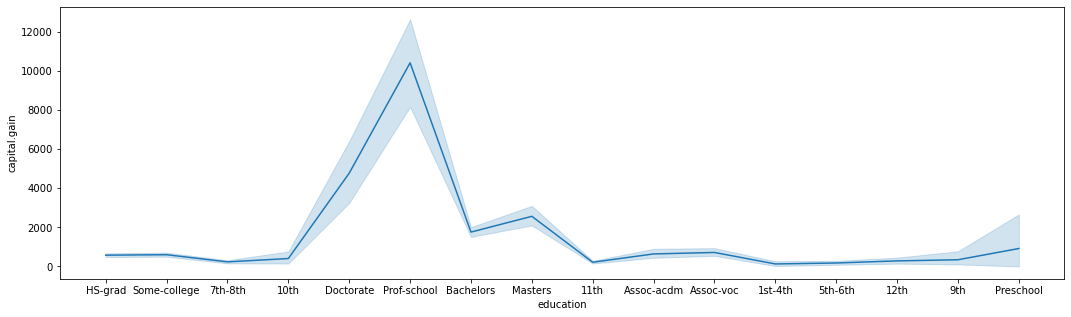

In [ ]:
plt.figure(figsize=(18,5))
sns.lineplot(x='education',y='capital.gain',data=df)
plt.show()

### 17. Compare the working hours for each working class

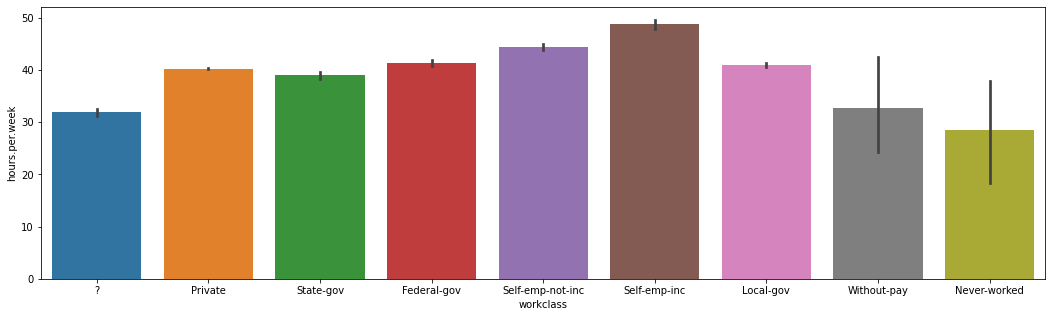

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(y='hours.per.week',x='workclass',data=df)
plt.show()

In [ ]:
df.groupby('workclass')['hours.per.week'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        48.818100
Self-emp-not-inc    44.423622
Federal-gov         41.379167
Local-gov           40.982800
Private             40.271027
State-gov           39.031587
Without-pay         32.714286
?                   31.919390
Never-worked        28.428571
Name: hours.per.week, dtype: float64

- As we can observe the average working hours for the workclass 'Self-emp-inc' is the maximum.

### 18. Study the variation in income by gender

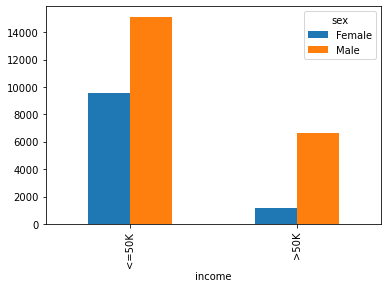

In [ ]:
pd.crosstab(df['income'],df['sex']).plot(kind='bar')
plt.show()

### 19. Compare the income by race

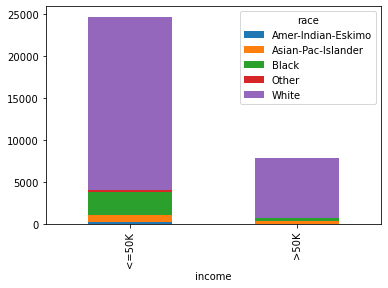

In [ ]:
pd.crosstab(df['income'],df['race']).plot(kind='bar',stacked=True)
plt.show()

- We can observe that there more number of people whose race is white in both the income category. 

### 20. Is there an all male profession according to the data?

In [ ]:
pd.crosstab(df['occupation'],df['sex'])

sex,Female,Male
occupation,,
?,841,1002
Adm-clerical,2535,1233
Armed-Forces,0,9
Craft-repair,222,3872
Exec-managerial,1159,2906
Farming-fishing,65,927
Handlers-cleaners,164,1205
Machine-op-inspct,549,1451
Other-service,1799,1492


- Yes there is an profession which is all males -- ARMED FORCES

### 21. How is income related to marital status?

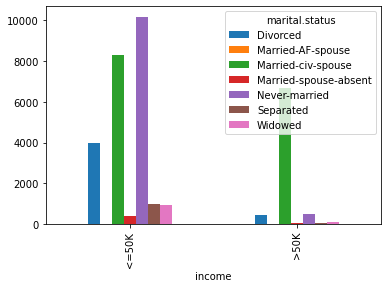

In [ ]:
pd.crosstab(df['income'],df['marital.status']).plot(kind='bar')
plt.show()

### 22. Check if there are any unwanted characters in the data and handle them using appropriate methods.

In [ ]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

- We can observe that in the columns workclass and occupation there is invalid value identified as '?', lets handle them using appropriate methods.

In [ ]:
## let us replace '?' as others in the column workclass
df['workclass'] = df['workclass'].str.replace('?','Others')

In [ ]:
## recheck 
df['workclass'].unique()

array(['Others', 'Private', 'State-gov', 'Federal-gov',
       'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay',
       'Never-worked'], dtype=object)

In [ ]:
## let us replace '?' as other-service in the column occupation
df['occupation'] = df['occupation'].str.replace('?','Other-service')

In [ ]:
## recheck 
df['occupation'].unique()

array(['Other-service', 'Exec-managerial', 'Machine-op-inspct',
       'Prof-specialty', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

### 22. In the above analysis we have seen that column 'age' has presence of outliers. Use a transformation approach to handle the outliers present in the column age.

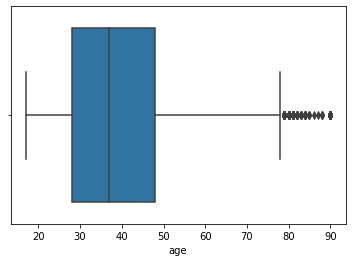

In [ ]:
sns.boxplot(df['age'])
plt.show()

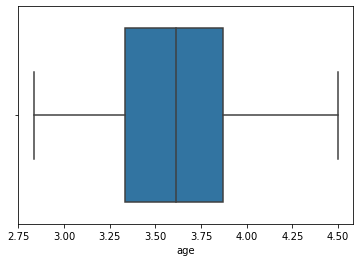

In [ ]:
## let use log transformation and transform the column age and visualize the distribution
age_log = np.log(df['age'])
sns.boxplot(age_log)
plt.show()

- As we can see from the above boxplots we have dealt with outliers using log transformation approach.

### 23. It is noted that column 'fnlwgt' (weights based on demographic characteritics) has outliers. Detect the outliers and treat the outliers using IQR method

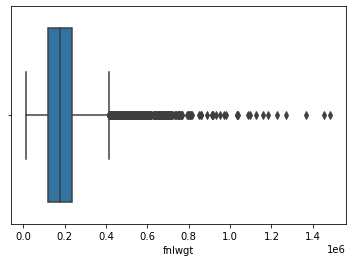

In [ ]:
sns.boxplot(df['fnlwgt'])
plt.show()

In [ ]:
# Using IQR method
Q1 = df['fnlwgt'].quantile(0.25)
Q3 = df['fnlwgt'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

117827.0
236993.0
119166.0


In [ ]:
lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)
print(lower_whisker)
print(upper_whisker)

-60922.0
415742.0


In [ ]:
df_out = df.loc[(df['fnlwgt'] < upper_whisker) & (df['fnlwgt'] > lower_whisker)] # rows without outliers

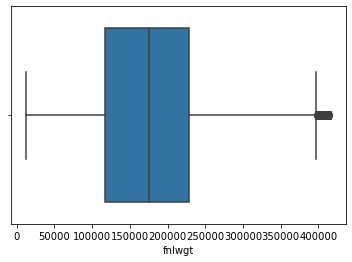

In [ ]:
## distribution after outlier treatment
sns.boxplot(df_out['fnlwgt'])
plt.show()

### 24. As we know most of the machine learning models cannot handle string input, So in order to prepare data for model building encode the categorical variables using appropriate methods.

In [ ]:
## drop the redundant categorical features first
## since we have education number we can drop the column education 
df.drop(['native.country','education'],axis=1,inplace=True)

- We will Label encode the columns 'workclass', 'occupation',  'race',  'relationship', and 'martial status'

In [ ]:
le = LabelEncoder()

In [ ]:
## Label encoding multiple columns
df.iloc[:,[1,4,5,6,7]] = df.iloc[:,[1,4,5,6,7]].apply(le.fit_transform)

In [ ]:
## Check the columns after label encoding
df.iloc[:,[1,4,5,6,7]].head()

,workclass,marital.status,occupation,relationship,race
0,3,6,7,1,4
1,4,6,3,1,4
2,3,6,7,4,2
3,4,0,6,4,4
4,4,5,9,3,4


- We will dummy encode the columns 'sex', and 'income'

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,capital.gain,capital.loss,hours.per.week,sex_Male,income_>50K
0,90,3,77053,9,6,7,1,4,0,4356,40,0,0
1,82,4,132870,9,6,3,1,4,0,4356,18,0,0
2,66,3,186061,10,6,7,4,2,0,4356,40,0,0
3,54,4,140359,4,0,6,4,4,0,3900,40,0,0
4,41,4,264663,10,5,9,3,4,0,3900,40,0,0


- We can observe from the above dataframe, we have successfully encoded the categorical variables.

### 25. Transform the column 'fnlwgt'  such that it will have the mean zero and variance one.

In [ ]:
## we can do that using sklearn standard scalar
ss = StandardScaler()

df['tranformed_fnlwgt'] = ss.fit_transform(df[['fnlwgt']])

In [ ]:
## check mean for the tranformed column
print('mean of the transformed column:',df['tranformed_fnlwgt'].mean())

## check variance for the transformed column
print('varaiance of the transformed columns:',df['tranformed_fnlwgt'].var())

mean of the transformed column: -1.4275136891066139e-16
varaiance of the transformed columns: 1.000030735185635


### Happy Learning :)